<a href="https://colab.research.google.com/github/Nobel712/GAN/blob/main/GAN_caifer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
from keras.layers import Input, Dense,Reshape,Flatten
from keras.layers import BatchNormalization,LeakyReLU
from keras.models import Sequential,Model
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
img_rows=28
img_cols=28
channels=1
img_shape=(img_rows,img_cols,channels)

In [ ]:
def build_generator():

    noise_shape = (100,)

    model = Sequential()

    model.add(Dense(256, input_shape=noise_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))

    model.add(Dense(np.prod(img_shape), activation='tanh'))
    model.add(Reshape(img_shape))

    model.summary()

    noise = Input(shape=noise_shape)
    img = model(noise)

    return Model(noise, img)


In [ ]:
from keras.src.engine import sequential
def build_discriminator():
  model=Sequential()
  model.add(Flatten(input_shape=img_shape))
  model.add(Dense(512))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dense(256))
  model.add(Dense(1,activation='sigmoid'))
  img=Input(shape=img_shape)
  validity=model(img)
  return Model(img,validity)

In [ ]:
def train(epochs, batch_size=128, save_interval=50):
    (X_train, _), (_, _) = tf.keras.datasets.mnist.load_data()
    X_train = (X_train.astype(np.float32) - 127.5) / 127.5
    X_train = np.expand_dims(X_train, axis=3)

    half_batch = int(batch_size / 2)
    for epoch in range(epochs):
        idx = np.random.randint(0, X_train.shape[0], half_batch)
        imgs = X_train[idx]
        noise = np.random.normal(0, 1, (half_batch, 100))
        gen_imgs = generator.predict(noise)
        d_loss_real = discriminator.train_on_batch(imgs, np.ones((half_batch, 1)))
        d_loss_fake = discriminator.train_on_batch(gen_imgs, np.zeros((half_batch, 1)))
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
        noise = np.random.normal(0, 1, (batch_size, 100))
        valid_y = np.array([1] * batch_size)
        g_loss = combined.train_on_batch(noise, valid_y)
        print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))
        if epoch % save_interval == 0:
            save_imgs(epoch)

In [ ]:
def save_imgs(epoch):
  r,c=5,5
  noise=np.random.normal(0,1,(r*c,100))
  gen_imgs=generator.predict(noise)
  gen_imags=0.5*gen_imgs*0.5
  fig,axs=plt.subplots(r,c)
  cnt = 0
  for i in range(r):
      for j in range(c):
            axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
            axs[i,j].axis('off')
            cnt += 1
  fig.savefig("images/mnist_%d.png" % epoch)
  plt.close()

In [ ]:
import tensorflow as tf
optimizer=tf.keras.optimizers.legacy.Adam(0.003,0.5)
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy'])


In [ ]:
generator = build_generator()
generator.compile(loss='binary_crossentropy', optimizer=optimizer)

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_61 (Dense)            (None, 256)               25856     
                                                                 
 leaky_re_lu_36 (LeakyReLU)  (None, 256)               0         
                                                                 
 batch_normalization_25 (Ba  (None, 256)               1024      
 tchNormalization)                                               
                                                                 
 dense_62 (Dense)            (None, 512)               131584    
                                                                 
 leaky_re_lu_37 (LeakyReLU)  (None, 512)               0         
                                                                 
 batch_normalization_26 (Ba  (None, 512)               2048      
 tchNormalization)                                   

In [ ]:
z = Input(shape=(100,))
img = generator(z)

In [ ]:
discriminator.trainable = False

In [ ]:
valid = discriminator(img)
combined = Model(z, valid)
combined.compile(loss='binary_crossentropy', optimizer=optimizer)

1/1 [==============================] - 0s 197ms/step
0 [D loss: 0.861921, acc.: 31.25%] [G loss: 1.446897]
1/1 [==============================] - 0s 28ms/step


FileNotFoundError: ignored

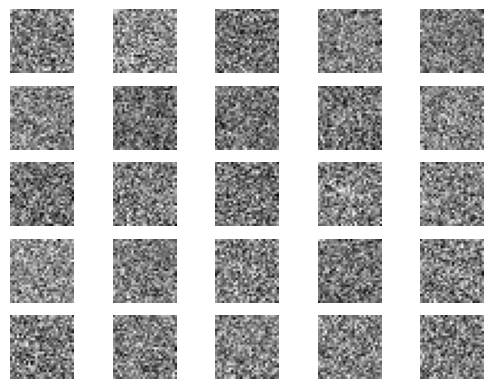

In [ ]:
train(epochs=100, batch_size=32, save_interval=10)

In [ ]:
generator.save('generator_model.h5')